### Excercise 1: Reach > 97% accuracy on the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X, y = mnist.data, mnist.target

In [4]:
# Create the test set and set it aside. The last 10000 images are the test images in this MNIST dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Let's train one with default settings to get our baseline.
# Using accuracy metric is fine since classes are roughly equal in size
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=8)


array([0.9676 , 0.9671 , 0.96755])

In [10]:
# We're pretty close already! Let's try grid search on the n_neighbors and weight parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors': [3, 5, 10, 20],
     'weights': ['uniform', 'distance']}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3,
                           scoring="accuracy", n_jobs=8, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.1s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  41.1s
[CV] END ....................n_neighbors=3, weights=distance; total time=  46.7s
[CV] END ....................n_neighbors=3, weights=distance; total time=  47.4s
[CV] END ....................n_neighbors=3, weights=distance; total time=  48.2s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  48.7s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  49.3s
[CV] END .....................n_neighbors=3, weights=uniform; total time=  49.5s
[CV] END .....................n_neighbors=5, weights=uniform; total time=  40.4s
[CV] END ....................n_neighbors=5, weights=distance; total time=  40.7s
[CV] END ....................n_neighbors=5, weights=distance; total time=  38.6s
[CV] END ....................n_neighbors=5, weigh

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'n_neighbors': [3, 5, 10, 20],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

In [11]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [12]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [13]:
grid_search.best_score_

0.9693333333333333

In [14]:
param_grid = [
    {'n_neighbors': [1, 2, 30],
     'weights': ['distance']}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3,
                           scoring="accuracy", n_jobs=8, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 3/3] END ...n_neighbors=1, weights=distance;, score=0.967 total time=  37.1s
[CV 1/3] END ...n_neighbors=1, weights=distance;, score=0.969 total time=  38.0s
[CV 2/3] END ...n_neighbors=1, weights=distance;, score=0.967 total time=  38.0s
[CV 1/3] END ..n_neighbors=30, weights=distance;, score=0.952 total time=  40.3s
[CV 2/3] END ..n_neighbors=30, weights=distance;, score=0.952 total time=  40.6s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  41.6s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.967 total time=  41.7s
[CV 3/3] END ...n_neighbors=2, weights=distance;, score=0.967 total time=  42.1s
[CV 3/3] END ..n_neighbors=30, weights=distance;, score=0.954 total time=  34.3s


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid=[{'n_neighbors': [1, 2, 30], 'weights': ['distance']}],
             scoring='accuracy', verbose=3)

In [16]:
grid_search.best_score_, grid_search.best_params_

(0.96755, {'n_neighbors': 1, 'weights': 'distance'})

In [17]:
param_grid = [
    {'n_neighbors': [1, 2, 3, 4, 5],
     'weights': ['distance'],
     'p': [1, 2, 3]}
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3,
                           scoring="accuracy", n_jobs=8, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 2/3] END n_neighbors=1, p=2, weights=distance;, score=0.967 total time=  35.8s
[CV 1/3] END n_neighbors=1, p=2, weights=distance;, score=0.969 total time=  35.8s
[CV 3/3] END n_neighbors=1, p=2, weights=distance;, score=0.967 total time=  35.8s
[CV 3/3] END n_neighbors=1, p=1, weights=distance;, score=0.961 total time= 4.9min
[CV 2/3] END n_neighbors=1, p=1, weights=distance;, score=0.959 total time= 4.9min
[CV 1/3] END n_neighbors=1, p=1, weights=distance;, score=0.962 total time= 4.9min
[CV 2/3] END n_neighbors=2, p=1, weights=distance;, score=0.959 total time= 5.0min
[CV 1/3] END n_neighbors=2, p=2, weights=distance;, score=0.969 total time=  39.3s
[CV 1/3] END n_neighbors=2, p=1, weights=distance;, score=0.962 total time= 5.0min
[CV 2/3] END n_neighbors=2, p=2, weights=distance;, score=0.967 total time=  39.3s
[CV 3/3] END n_neighbors=2, p=2, weights=distance;, score=0.967 total time=  36.7s
[CV 3/3] END n_neighbors=2

KeyboardInterrupt: 

Seems harder than I thought... let's leave it for now.
Best parameters found so far: n_neighbors=3, weights='distance' (score=0.969).
EDIT: the book solution achieved > 97% accuracy with n_neighbors=4!

### Excercise 2: Data augmentation with shifted and rotated images

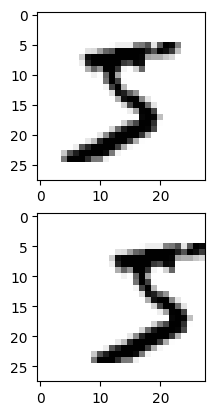

In [22]:
from scipy.ndimage import shift

# Let's try the shift function
some_digit = X_train[0].reshape(28, 28)
shifted = shift(some_digit, [0, 5], cval=0)
plt.subplot(211)
plt.imshow(some_digit, cmap="binary")
plt.subplot(212)
plt.imshow(shifted, cmap="binary")

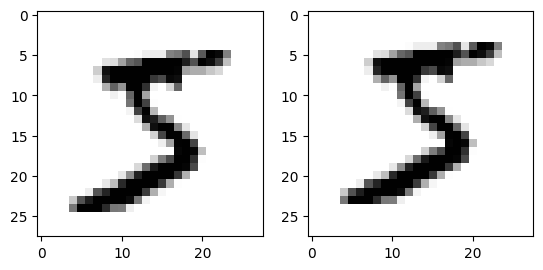

In [24]:
# Looks like it's working fine. Now let's write a function that can shift an image by one pixel in any direction
from sklearn.utils.validation import check_array

def shift_image(X, direction='right'):
    X = check_array(X)
    assert direction in ['right', 'left', 'up', 'down'], "Invalid direction given"
    shift_values = {
        'right': [0, 1],
        'left': [0, -1],
        'up': [-1, 0],
        'down': [1, 0]}
    return shift(X, shift_values[direction], cval=0)


plt.subplot(121)
plt.imshow(some_digit, cmap="binary")
plt.subplot(122)
plt.imshow(shift_image(some_digit, direction='up'), cmap="binary")

In [27]:
shifted.reshape((784,)).shape

(784,)

In [28]:
# Cool! Now let's augment the dataset
X_train_copy = X_train.copy()
np.vstack([X_train_copy, shifted.reshape(784,)]).shape

(60001, 784)

In [31]:
X_train_new = np.empty((60000*4, 784))
y_train_new = np.repeat(y_train, 4)

In [35]:
for i, image in enumerate(X_train[:3]):
    print(i, image)

0 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0 

In [36]:
directions = ['right', 'left', 'down', 'up']
for i, image in enumerate(X_train):
    for direction in directions:
        shifted = shift_image(image.reshape(28, 28), direction)
        X_train_new[i*len(directions) + directions.index(direction)] = shifted.reshape((784,))
        
        

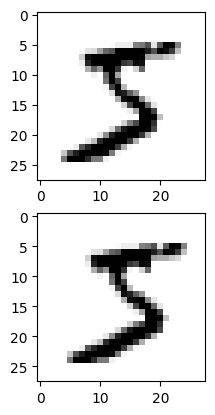

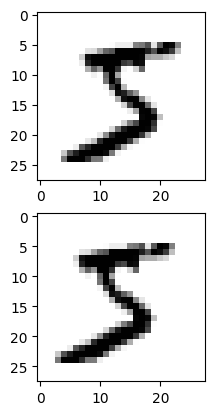

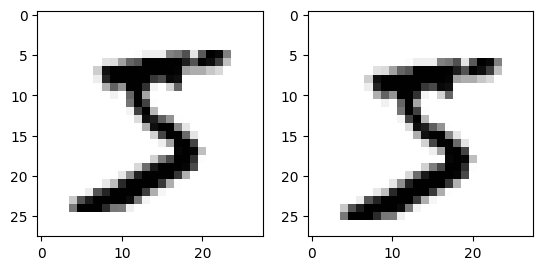

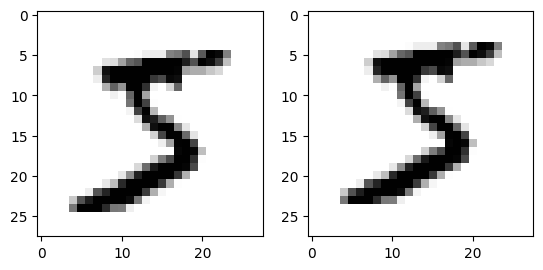

In [39]:
plt.figure()
plt.subplot(211)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.subplot(212)
plt.imshow(X_train_new[0].reshape(28, 28), cmap='binary')

plt.figure()
plt.subplot(211)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.subplot(212)
plt.imshow(X_train_new[1].reshape(28, 28), cmap='binary')

plt.figure()
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.subplot(122)
plt.imshow(X_train_new[2].reshape(28, 28), cmap='binary')

plt.figure()
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.subplot(122)
plt.imshow(X_train_new[3].reshape(28, 28), cmap='binary')

In [40]:
y_train_new[:4]

array(['5', '5', '5', '5'], dtype=object)

In [43]:
X_train_augmented = np.vstack([X_train, X_train_new])
y_train_augmented = np.hstack([y_train, y_train_new])

In [44]:
print(y_train_augmented[0], y_train_augmented[60000:60004])

5 ['5' '5' '5' '5']


In [45]:
knn_clf = KNeighborsClassifier(n_neighbors=3, weights="distance")
cross_val_score(knn_clf, X_train_augmented, y_train_augmented,
                scoring="accuracy", n_jobs=8, verbose=3)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.995) total time=10.0min
[CV] END ................................ score: (test=0.981) total time=10.0min


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed: 10.0min remaining: 15.0min


[CV] END ................................ score: (test=0.982) total time=10.0min
[CV] END ................................ score: (test=0.980) total time=10.0min
[CV] END ................................ score: (test=0.982) total time=10.0min


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed: 10.1min finished


array([0.99525   , 0.98166667, 0.9822    , 0.98106667, 0.98033333])

Success!

*_Note_*: I should have shuffled the augmented training set e.g. with _np.random.permutation()_
```python
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
```